# Keras를 이용한 손글씨 인식 딥러닝
- Tensorflow로 작성된 프로그램은 sklearn Library를 사용할 때 보다 어렵다
- Keras는 머신러닝 라이브러리 테아노(Theano)와 Tensorflow를 Wrapping한 라이브러리

In [1]:
import pandas as pd
train = pd.read_csv("../Data/train_20k.csv", header=None)
test = pd.read_csv("../Data/test_1k.csv", header=None)
print(train.head())
print(test.head())
print(train.count())

   0    1    2    3    4    5    6    7    8    9    ...  775  776  777  778  \
0    5    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
1    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
2    4    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
3    1    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
4    9    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   

   779  780  781  782  783  784  
0    0    0    0    0    0    0  
1    0    0    0    0    0    0  
2    0    0    0    0    0    0  
3    0    0    0    0    0    0  
4    0    0    0    0    0    0  

[5 rows x 785 columns]
   0    1    2    3    4    5    6    7    8    9    ...  775  776  777  778  \
0    7    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
1    2    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
2    1    0    0    0    0    0    0    0    0    0

---
### Preprocessing(전처리)

In [3]:
# null
train.isnull().sum().sum()

0

In [4]:
test.isnull().sum().sum()

0

In [7]:
# train과 test를 Feature와 Target으로 분리하고 정규화하자
train_label = train[0]
train_data = train.drop(0, axis=1) / 255.0

test_label = test[0]
test_data = test.drop(0, axis=1) / 255.0

### Deep Learning Model 만들기

In [11]:
# GPU 사용 설정

import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

In [12]:
from tensorflow import keras

In [33]:
model = keras.Sequential()

model.add(keras.layers.Dense(256, activation="tanh", input_shape=(784,)))
model.add(keras.layers.Dense(10, activation="softmax"))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [34]:
import numpy as np

In [35]:
model.fit(train_data, train_label ,epochs=50)

Epoch 1/50
626/626 [==============================] - 2s 2ms/step - loss: 0.3806 - accuracy: 0.8906
Epoch 2/50
626/626 [==============================] - 2s 3ms/step - loss: 0.2095 - accuracy: 0.9391
Epoch 3/50
626/626 [==============================] - 2s 2ms/step - loss: 0.1461 - accuracy: 0.9578
Epoch 4/50
626/626 [==============================] - 2s 3ms/step - loss: 0.1080 - accuracy: 0.9681
Epoch 5/50
626/626 [==============================] - 2s 2ms/step - loss: 0.0803 - accuracy: 0.9763
Epoch 6/50
626/626 [==============================] - 2s 2ms/step - loss: 0.0607 - accuracy: 0.9824
Epoch 7/50
626/626 [==============================] - 2s 2ms/step - loss: 0.0439 - accuracy: 0.9887
Epoch 8/50
626/626 [==============================] - 2s 2ms/step - loss: 0.0315 - accuracy: 0.9928
Epoch 9/50
626/626 [==============================] - 2s 2ms/step - loss: 0.0234 - accuracy: 0.9949
Epoch 10/50
626/626 [==============================] - 1s 2ms/step - loss: 0.0174 - accuracy: 0.9969

---
### 테스트 데이터로 평가하기

In [37]:
score = model.evaluate(test_data, np.array(test_label))
print("loss :", score[0])
print("accuracy :", score[1])

32/32 [==============================] - 0s 2ms/step - loss: 0.1125 - accuracy: 0.9740
loss : 0.11254296451807022
accuracy : 0.9740259647369385


---
### test_data로 predict 해보기

In [45]:
pred = model.predict(test_data)
print("test label :", test_label[:10])
print("pred :", np.argmax(pred[:10], axis=1))

32/32 [==============================] - 0s 2ms/step
test label : 0    7
1    2
2    1
3    0
4    4
5    1
6    4
7    9
8    5
9    9
Name: 0, dtype: int64
pred : [7 2 1 0 4 1 4 9 6 9]


In [46]:
# max값이 있는 index 출력
np.argmax(np.array([1,4,3,2]))


1

---
# 번외 : Image 만들기

In [47]:
from PIL import Image

In [48]:
# 0번의 정답을 제외한 데이터 만들기
train1 = train.loc[:, train.columns != 0]
train1.shape

(20001, 784)

In [49]:
# train_data의 50번의 크기 조절하기
abc = np.array(train1.iloc[50]).reshape(28,28)
abc.shape

(28, 28)

In [50]:
# Image 만들기
image = Image.fromarray((abc).astype(np.uint8))
image

In [51]:
# image 저장하기
image.save("../Data/mnist_test3.jpg", "JPEG")

---
# 이미지를 불러서 Prdict 해보기

In [52]:
# Image 불러오기
img = Image.open("../Data/mnist_test3.jpg")
img

In [53]:
import matplotlib.pyplot as plt


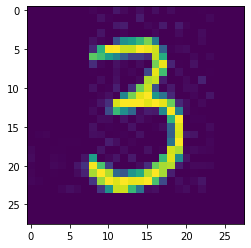

In [54]:
import matplotlib.pyplot as plt
plt.imshow(img)
plt.show()

In [55]:

# image를 numy 배열로 변환
imgArray = np.array(img)
imgArray = imgArray / 255.0
imgArray.shape

(28, 28)

In [56]:
# image를 1차원ㅂ ㅐ열로 변환
imgArray2 = imgArray.reshape(-1)

In [57]:
imgArray2.shape

(784,)

In [58]:
imgArray3 = imgArray2.tolist()

In [60]:
dfArray = pd.DataFrame(imgArray3)
dfArray = dfArray.T
dfArray

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.011765,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [61]:
print("예측값", np.argmax(model.predict(dfArray), axis=1))

1/1 [==============================] - 0s 25ms/step
예측값 [3]
